#### Student Name: Mai Ngo
#### Course Name and Number: DSC 578 Neural Network and Deep Learning - SEC 701
#### Assignment 1 - Part 3: Your Own Application Code with Visualization
#### Date: 10/8/2023

In [1]:
from ipynb.fs.defs.NN578hw3_Modified_Network import Network as network
from ipynb.fs.defs.NN578hw3_Modified_Network import loadCSV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data (using the custom function defined in the class Notebook).
irisData = loadCSV('iris-3.csv', 4, 3)
irisTrain = irisData[:105]
irisTest = irisData[105:]

In [3]:
#Create new network.
net1 = network([4,7,3])

In [4]:
#Re-load the saved network and run it again for the maximum of 100 epochs, this
#time with a test set. The execution actually terminates ealier because of the
#'no improvement over the last two epochs' condition.
trainRes, testRes = net1.SGD(irisTrain, 100, 8, 0.315, irisTest)
print ('\n------ Returned Results --------------')
print ('** train: {}'.format(trainRes[-1]))
print ('** valid: {}'.format(testRes[-1]))
#print ('\n--------------------------------------')
#print ('Initial activations length = {} <== MUST be 3'.format(net2.init_acts_len))
print ('\n*************************************************')
print ('Initial activations shape: {}'.format(net1.init_acts_shape))
print ('*************************************************')

[Epoch 0] Train: Count=  32, Accuracy=0.3048, MSE=0.3312, CE=1.8849, LL=1.0421
[Epoch 0] Valid: Count=  18, Accuracy=0.4000, MSE=0.3222, CE=1.8496, LL=1.0137
[Epoch 1] Train: Count=  37, Accuracy=0.3524, MSE=0.2808, CE=1.6544, LL=0.8956
[Epoch 1] Valid: Count=  20, Accuracy=0.4444, MSE=0.2783, CE=1.6478, LL=0.8886
[Epoch 2] Train: Count=  69, Accuracy=0.6571, MSE=0.2480, CE=1.5264, LL=0.7896
[Epoch 2] Valid: Count=  31, Accuracy=0.6889, MSE=0.2499, CE=1.5351, LL=0.7990
[Epoch 3] Train: Count=  70, Accuracy=0.6667, MSE=0.2311, CE=1.4585, LL=0.7316
[Epoch 3] Valid: Count=  31, Accuracy=0.6889, MSE=0.2345, CE=1.4728, LL=0.7462
[Epoch 4] Train: Count=  71, Accuracy=0.6762, MSE=0.2202, CE=1.4110, LL=0.6944
[Epoch 4] Valid: Count=  31, Accuracy=0.6889, MSE=0.2240, CE=1.4269, LL=0.7097
[Epoch 5] Train: Count=  71, Accuracy=0.6762, MSE=0.2119, CE=1.3718, LL=0.6663
[Epoch 5] Valid: Count=  31, Accuracy=0.6889, MSE=0.2157, CE=1.3881, LL=0.6811
[Epoch 6] Train: Count=  71, Accuracy=0.6762, MSE=0.

In [5]:
trainAccuracy = []
trainMSE = []
trainCE = []
trainLL = []
for trainEpoch in trainRes: 
    trainAccuracy.append(trainEpoch['Accuracy'])
    trainMSE.append(trainEpoch['MSE'])
    trainCE.append(trainEpoch['CE'])
    trainLL.append(trainEpoch['LL'])
    
testAccuracy = []
testMSE = []
testCE = []
testLL = []
for testEpoch in testRes: 
    testAccuracy.append(testEpoch['Accuracy'])
    testMSE.append(testEpoch['MSE'])
    testCE.append(testEpoch['CE'])
    testLL.append(testEpoch['LL'])

#### Evaluation visualization of network [4,7,3].

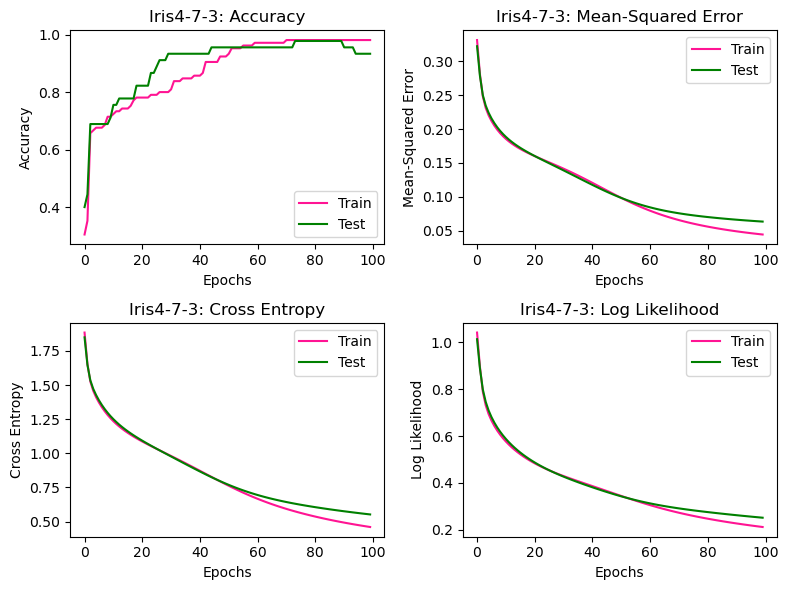

In [6]:
epochs = list(range(100))
trainRes_evalList = [trainAccuracy, trainMSE, trainCE, trainLL]
testRes_evalList = [testAccuracy, testMSE, testCE, testLL]
evalNames = ['Accuracy', 'Mean-Squared Error', 'Cross Entropy', 'Log Likelihood']

plt.figure(figsize=(8, 6))

for i, evalName in enumerate(evalNames, start=1):
    plt.subplot(2, 2, i)
    plt.plot(epochs, trainRes_evalList[i - 1], label='Train', color='deeppink')
    plt.plot(epochs, testRes_evalList[i - 1], label='Test', color='green')
    plt.xlabel('Epochs')
    plt.ylabel(evalName)
    plt.title(f'Iris4-7-3: {evalName}')
    plt.legend()

plt.tight_layout()
plt.show()